### Define Google Cloud project information

In [1]:
import google.auth

try:
    # google.auth.default() 會自動尋找環境中的憑證
    # 這就是所謂的 Application Default Credentials (ADC)
    credentials, project_id = google.auth.default()

    print("✅ 憑證讀取成功！")
    print(f"使用的憑證類型: {type(credentials).__name__}")
    
    # UserCredentials 通常代表你透過 `gcloud auth application-default login` 登入的帳號
    if hasattr(credentials, 'client_id'):
        print(f"用戶端 ID (Client ID): {credentials.client_id}")

    # 如果憑證有效，它應該會有一個 token
    if credentials.token:
        # 出於安全考量，我們只顯示 token 的一小部分或其存在性
        print("憑證 Token: [存在]")
    else:
        # 如果需要，可以手動刷新來獲取 token
        # from google.auth.transport.requests import Request
        # credentials.refresh(Request())
        # print("憑證 Token: [刷新後存在]")
        print("憑證 Token: [目前為空，執行操作時會自動刷新]")
        

    print(f"偵測到的專案 ID: {project_id}")
    if project_id is None:
        print("⚠️ 注意：未自動偵測到專案 ID。你可能需要在初始化服務時手動指定。")
        print("   (例如: vertexai.init(project='your-project-id', ...))")

except google.auth.exceptions.DefaultCredentialsError:
    print("❌ 錯誤：找不到預設憑證 (Application Default Credentials)。")
    print("請在終端機中執行 `gcloud auth application-default login` 來登入。")
except Exception as e:
    print(f"發生了未預期的錯誤: {e}")

✅ 憑證讀取成功！
使用的憑證類型: Credentials
憑證 Token: [目前為空，執行操作時會自動刷新]
偵測到的專案 ID: gen-lang-client-0570552573


In [2]:
import os
import google.auth

try:
    # 檢查 GOOGLE_APPLICATION_CREDENTIALS 環境變數是否被設定
    sa_key_path = os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')

    if sa_key_path:
        print("✅ 偵測到 GOOGLE_APPLICATION_CREDENTIALS 環境變數。")
        print(f"   金鑰檔案路徑: {sa_key_path}")
        print("---")
        print("身份判定：服務帳戶 (Service Account)")
        
        # 從金鑰檔案載入憑證並顯示服務帳戶信箱
        credentials, project_id = google.auth.load_credentials_from_file(sa_key_path)
        if hasattr(credentials, 'service_account_email'):
            print(f"服務帳戶 Email: {credentials.service_account_email}")
        print(f"金鑰檔案內建的專案 ID: {project_id}")

    else:
        print("ℹ️ 未偵測到 GOOGLE_APPLICATION_CREDENTIALS 環境變數。")
        print("   系統將嘗試使用 gcloud 使用者憑證。")
        print("---")
        print("身份判定：個人使用者帳戶 (User Account)")
        
        # 尋找預設的使用者憑證
        credentials, project_id = google.auth.default()
        # 'authorized_user' 類型的憑證通常代表個人帳戶
        if credentials.token:
             # 在 gcloud auth application-default print-access-token 的輸出中可以找到email
             # 但 credentials 物件本身不直接暴露 email，我們可以檢查 quota_project_id
             if hasattr(credentials, 'quota_project_id'):
                  print(f"憑證關聯的 Quota Project ID: {credentials.quota_project_id}")
             print("此憑證來自 'gcloud auth application-default login'。")


except google.auth.exceptions.DefaultCredentialsError:
    print("❌ 錯誤：找不到任何有效的憑證。")
    print("請執行 'gcloud auth application-default login' 或設定 'GOOGLE_APPLICATION_CREDENTIALS'。")
except Exception as e:
    print(f"發生了未預期的錯誤: {e}")

✅ 偵測到 GOOGLE_APPLICATION_CREDENTIALS 環境變數。
   金鑰檔案路徑: C:\Users\ZieWeiXie\Desktop\1132\Financial Management\Final\English\gen-lang-client-0570552573-ed41756955d5.json
---
身份判定：服務帳戶 (Service Account)
服務帳戶 Email: multirag@gen-lang-client-0570552573.iam.gserviceaccount.com
金鑰檔案內建的專案 ID: gen-lang-client-0570552573


In [3]:
import os
import shutil

# --- 步驟 1: 打印出 Python Kernel 所能看到的 PATH 環境變數 ---
print("--- Python Kernel's PATH ---")
path_var = os.environ.get('PATH', '')
for p in path_var.split(os.pathsep):
    print(p)

# --- 步驟 2: 使用 Python 的方式直接檢查 'gcloud' 指令是否存在 ---
print("\n--- Checking for 'gcloud' command ---")
gcloud_path = shutil.which('gcloud')

if gcloud_path:
    print(f"✅ 'gcloud' 指令已找到，路徑為: {gcloud_path}")
else:
    print("❌ 錯誤: Python Kernel 的 PATH 中找不到 'gcloud' 指令。")

--- Python Kernel's PATH ---
c:\Users\ZieWeiXie\anaconda3\envs\MultiRAG
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\Library\mingw-w64\bin
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\Library\usr\bin
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\Library\bin
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\Scripts
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\bin
C:\Users\ZieWeiXie\anaconda3\condabin
C:\Users\ZieWeiXie\AppData\Local\Programs\Python\Python311
C:\Users\ZieWeiXie\AppData\Local\Programs\Python\Python311\Scripts
C:\Users\ZieWeiXie\AppData\Local\Programs\Python\Python36
C:\Users\ZieWeiXie\AppData\Local\Programs\Python\Python36\Scripts
C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v8.0\bin
C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v8.0\libnvvp
C:\Program Files\Common Files\Oracle\Java\javapath
C:\Windows\system32
C:\Windows
C:\Windows\System32\Wbem
C:\Windows\System32\WindowsPowerShell\v1.0
C:\Windows\System32\OpenSSH
C:\Program Files (

### Define Google Cloud project information


In [4]:
# Define project information

import sys

PROJECT_ID = "gen-lang-client-0570552573"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on colab, try to get the PROJECT_ID automatically
# GCLOUD_PATH = r"C:\Program Files (x86)\Google\Cloud SDK\google-cloud-sdk\bin\gcloud.CMD"
# if "google.colab" not in sys.modules:
#     import subprocess

#     PROJECT_ID = subprocess.check_output(
#         [GCLOUD_PATH, "config", "get-value", "project"],
#     ).strip()

print(f"Your project ID is: {PROJECT_ID}")

Your project ID is: gen-lang-client-0570552573


In [5]:
import sys

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [6]:
from rich import print as rich_print
from rich.markdown import Markdown as rich_Markdown
from IPython.display import Markdown, display
from vertexai.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part,
)
from vertexai.language_models import TextEmbeddingModel
from vertexai.vision_models import MultiModalEmbeddingModel

In [7]:
# Multimodal models: Choose based on your performance/cost needs

multimodal_model_2_0_flash = GenerativeModel(
    "gemini-2.0-flash-001"
) # Gemini latest Gemini 2.0 Flash Model

multimodal_model_15 = GenerativeModel(
    "gemini-2.0-flash-001"
)  # works with text, code, images, video(with or without audio) and audio(mp3) with 1M input context - complex reasoning

# Multimodal models: Choose based on your performance/cost needs
multimodal_model_15_flash = GenerativeModel(
    "gemini-2.0-flash-001"
)  # works with text, code, images, video(with or without audio) and audio(mp3) with 1M input context - faster inference

# Load text embedding model from pre-trained source
text_embedding_model = TextEmbeddingModel.from_pretrained("text-embedding-005")

# Load multimodal embedding model from pre-trained source
multimodal_embedding_model = MultiModalEmbeddingModel.from_pretrained(
    "multimodalembedding@001"
)  # works with image, image with caption(~32 words), video, video with caption(~32 words)

#### Get documents and images from GCS

In [8]:
# # download documents and images used in this notebook - will take ~30 sec
# !gsutil -m -q rsync -r gs://github-repo/rag/intro_multimodal_rag/intro_multimodal_rag_v2 .
# print("Download completed")

## Building metadata of documents containing text and images

### Import helper functions to build metadata

Before building the Multimodal Question Answering System with Vertex AI, it's important to have metadata of all the text and images in the document. For references and citations purposes, the metadata should contain essential elements, including page number, file name, image counter, and so on. Hence, as a next step, you will generate embeddings from the metadata, which is required to perform similarity search when querying the data.

In [9]:
from multimodal_qa_with_rag_utils import (
    get_document_metadata,
    set_global_variable,
)

set_global_variable("text_embedding_model", text_embedding_model)
set_global_variable("multimodal_embedding_model", multimodal_embedding_model)

**NOTE: Given that we are loading 4 files with roughly 200 pages and approximately 84 images, the cell below will take approximately 7 minutes to run. We recommend loading pre-computed metadata instead.**

In [10]:
%%time
# Specify the PDF folder with multiple PDF ~7m

print("Removing pre-exsisting images folder, since you are running the logic from scratch")
! rm -rf images/

pdf_folder_path = "data/"  # if running in Vertex AI Workbench.

# Specify the image description prompt. Change it
# image_description_prompt = """Explain what is going on in the image.
# If it's a table, extract all elements of the table.
# If it's a graph, explain the findings in the graph.
# Do not include any numbers that are not mentioned in the image.
# """

image_description_prompt = """You are a technical image analysis expert. You will be provided with various types of images extracted from documents like research papers, technical blogs, and more.
Your task is to generate concise, accurate descriptions of the images without adding any information you are not confident about.
Focus on capturing the key details, trends, or relationships depicted in the image.

Important Guidelines:
* Prioritize accuracy:  If you are uncertain about any detail, state "Unknown" or "Not visible" instead of guessing.
* Avoid hallucinations: Do not add information that is not directly supported by the image.
* Be specific: Use precise language to describe shapes, colors, textures, and any interactions depicted.
* Consider context: If the image is a screenshot or contains text, incorporate that information into your description.
"""


# Extract text and image metadata from the PDF document
text_metadata_df, image_metadata_df = get_document_metadata(
    multimodal_model_2_0_flash,  # we are passing gemini 2.0 Flash Model
    pdf_folder_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
    # add_sleep_after_page = True, # Uncomment this if you are running into API quota issues
    # sleep_time_after_page = 5,
    add_sleep_after_document=True,  # Uncomment this if you are running into API quota issues
    sleep_time_after_document=5,    # Increase the value in seconds, if you are still getting quota issues. It will slow down the processing.
    # generation_config = # see next cell
    # safety_settings =  # see next cell
)

print("\n\n --- Completed processing. ---")


Removing pre-exsisting images folder, since you are running the logic from scratch


 Processing the file: --------------------------------- data\intel.pdf 


Processing page: 1


'rm' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


Extracting image from page: 1, saved as: images\intel.pdf_image_0_0_21.png
Processing page: 2
Extracting image from page: 2, saved as: images\intel.pdf_image_1_0_24.png
Extracting image from page: 2, saved as: images\intel.pdf_image_1_1_25.png
Processing page: 3
Extracting image from page: 3, saved as: images\intel.pdf_image_2_0_28.png
Processing page: 4
Extracting image from page: 4, saved as: images\intel.pdf_image_3_0_31.png

 
 Sleeping for  5  sec before processing the next document to avoid quota issues. You can disable it: "add_sleep_after_document = False"  


 --- Completed processing. ---
CPU times: total: 359 ms
Wall time: 48.6 s


If you would like to pass additional parameters to Gemini while building metadata, here are some options:

In [11]:
# # Parameters for Gemini API call.
# # reference for parameters: https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/gemini

# generation_config=  GenerationConfig(temperature=0.2, max_output_tokens=2048)

# # Set the safety settings if Gemini is blocking your content or you are facing "ValueError("Content has no parts")" error or "Exception occured" in your data.
# # ref for settings and thresholds: https://cloud.google.com/vertex-ai/docs/generative-ai/multimodal/configure-safety-attributes

# safety_settings = {
#                   HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
#                   }

# # You can also pass parameters and safety_setting to "get_gemini_response" function

### Load pre-computed metadata of text and images from source document

**If you are facing constant issues with Quota or want to focus on the outputs, you should load pre-computed metadata.**

In [12]:
# # [Optional]
# import pickle

# # Load the pickle file
# with open("mrag_metadata.pkl", "rb") as f:
#     data = pickle.load(f)

# # Extract the DataFrames
# text_metadata_df = data["text_metadata"]
# image_metadata_df = data["image_metadata"]

#### Inspect the processed text metadata


The following cell will produce a metadata table which describes the different parts of text metadata, including:

- **text**: the original text from the page
- **text_embedding_page**: the embedding of the original text from the page
- **chunk_text**: the original text divided into smaller chunks
- **chunk_number**: the index of each text chunk
- **text_embedding_chunk**: the embedding of each text chunk

In [13]:
text_metadata_df.head()

,file_name,page_num,text,text_embedding_page,chunk_number,chunk_text,text_embedding_chunk
0,data\intel.pdf,1,Operating Expenses \nOperating Expenses Total ...,"[-0.037518732249736786, -0.04107023403048515, ...",1,Operating Expenses \nOperating Expenses Total ...,"[-0.038045983761548996, -0.045655425637960434,..."
1,data\intel.pdf,1,Operating Expenses \nOperating Expenses Total ...,"[-0.037518732249736786, -0.04107023403048515, ...",2,marily driven by investments in our process te...,"[-0.010080032050609589, -0.05168142914772034, ..."
2,data\intel.pdf,1,Operating Expenses \nOperating Expenses Total ...,"[-0.037518732249736786, -0.04107023403048515, ...",3,"time-to-time, engage in mergers and acquisitio...","[-0.029878836125135422, -0.04047561436891556, ..."
3,data\intel.pdf,2,\nReturn Excess Cash to Stockholders \nOur c...,"[-0.023356521502137184, -0.027727562934160233,...",1,\nReturn Excess Cash to Stockholders \nOur c...,"[-0.023250870406627655, -0.024463549256324768,..."
4,data\intel.pdf,2,\nReturn Excess Cash to Stockholders \nOur c...,"[-0.023356521502137184, -0.027727562934160233,...",2,"x, the S&P 500 Index, the S&P 500 IT Index, an...","[-0.025652848184108734, 0.017395608127117157, ..."


#### Inspect the processed image metadata

The following cell will produce a metadata table which describes the different parts of image metadata, including:
* **img_desc**: Gemini-generated textual description of the image.
* **mm_embedding_from_text_desc_and_img**: Combined embedding of image and its description, capturing both visual and textual information.
* **mm_embedding_from_img_only**: Image embedding without description, for comparison with description-based analysis.
* **text_embedding_from_image_description**: Separate text embedding of the generated description, enabling textual analysis and comparison.

In [14]:
image_metadata_df.head()

,file_name,page_num,img_num,img_path,img_desc,mm_embedding_from_img_only,text_embedding_from_image_description
0,data\intel.pdf,1,1,images\intel.pdf_image_0_0_21.png,The image shows two bar graphs comparing expen...,"[-0.00379384635, 0.0275382921, 0.012781281, -0...","[-0.04222716763615608, -0.01114147249609232, 0..."
1,data\intel.pdf,2,1,images\intel.pdf_image_1_0_24.png,Here is a description of the image:\n\nThe ima...,"[-0.00261490652, 0.00803151727, -0.0175046083,...","[-0.0311519093811512, -0.027998661622405052, -..."
2,data\intel.pdf,2,2,images\intel.pdf_image_1_1_25.png,Here are the bounding box detections:\n```json...,"[0.00753548834, 0.0195218138, -0.0373608284, 0...","[-0.012763133272528648, -0.010560288093984127,..."
3,data\intel.pdf,3,1,images\intel.pdf_image_2_0_28.png,"The image is a line graph titled ""Comparison o...","[0.0168273449, 0.0246418063, -0.0147422217, 0....","[-0.01851482316851616, 0.024407247081398964, 0..."
4,data\intel.pdf,4,1,images\intel.pdf_image_3_0_31.png,"The image shows a table of financial data, spe...","[0.0309953205, 0.00850136764, -0.0345904976, -...","[-0.0035932075697928667, -0.023271726444363594..."


### Import the helper functions to implement RAG

You will be importing the following functions which will be used in the remainder of this notebook to implement RAG:

* **get_similar_text_from_query():** Given a text query, finds text from the document which are relevant, using cosine similarity algorithm. It uses text embeddings from the metadata to compute and the results can be filtered by top score, page/chunk number, or embedding size.
* **print_text_to_text_citation():** Prints the source (citation) and details of the retrieved text from the `get_similar_text_from_query()` function.
* **get_similar_image_from_query():** Given an image path or an image, finds images from the document which are relevant. It uses image embeddings from the metadata.
* **print_text_to_image_citation():** Prints the source (citation) and the details of retrieved images from the `get_similar_image_from_query()` function.
* **get_gemini_response():** Interacts with a Gemini model to answer questions based on a combination of text and image inputs.
* **display_images():**  Displays a series of images provided as paths or PIL Image objects.

In [15]:
from multimodal_qa_with_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
    get_answer_from_qa_system,
)

Before implementing a Multimodal Question Answering System with Vertex AI, let's explore what you can achieve with just text or image embeddings. This will set the foundation for implementing a multimodal Retrieval Augmented Generation (RAG) system, which you will do later in this notebook.

You can also use these essential elements together to build applications for multimodal use cases, extracting meaningful information from documents.

## Text Search

Let's start the search with a simple question and see if the simple text search using text embeddings can answer it. The expected answer is to show the value of basic and diluted net income per share of Google for different share types.


In [16]:
query = "How about exactly stock performance of Intel recently?"

### Search similar text with text query

In [17]:
# Matching user text query with "chunk_embedding" to find relevant chunks.
matching_results_text = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    chunk_text=True,
)

# Print the matched text citations
print_text_to_text_citation(
    matching_results_text, print_top=False, chunk_text=True
)  # print_top=False to see all text matches

Citation 1: Matched text: 

score:  0.75
file_name:  data\intel.pdf
page_number:  2
chunk_number:  1
chunk_text:   
Return Excess Cash to Stockholders  
Our capital allocation strategy historically included returning excess cash to stockholders through 
dividends and stock repurchases. Our most recent stock repurchase was in the first quarter of 2021 
and we suspended the declaration of quarterly dividends starting with the fourth quarter of 2024. 
We agreed under our commercial CHIPS Act agreement to forgo paying dividends for the next two 
years, and agreed to limitations on the payment of dividends for the three years thereafter. Further, 
we do not expect to pay dividends or make stock repurchases until our cash flows improve as we 
focus on the critical investments needed to execute our business strategy and create long-term 
value. 
 
Stock Performance Graph 
The graph and table that follow compare the cumulative TSR of Intel's common stock with the 
cumulative total return of th

### Get answer with text-RAG

In [18]:
# All relevant text chunk found across documents based on user query
context = "\n".join(
    [value["chunk_text"] for key, value in matching_results_text.items()]
)

prompt = f"""Answer the question with the given context. If the specific answer is not in the context, please answer "I don't know".
Question: {query}
Context: {context}
Answer:
"""

In [19]:
safety_settings = {
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
}

In [20]:
%%time
# Generate response with Gemini 2.0 Flash
print("\n **** Result: ***** \n")

rich_Markdown(
    get_gemini_response(
        multimodal_model_2_0_flash,
        model_input=prompt,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: total: 46.9 ms
Wall time: 594 ms


I don't know.

### Search similar images with text query

Since plain text search and RAG didn't provide the detailed answer and the information may be visually represented in a table or another image format, you can use multimodal capability of Gemini 2.0 Flash for the similar task.

The goal here also is to find an image similar to the text query. You may also print the citations to verify.

In [21]:
query = "How about exactly stock performance of Intel recently?"


 **** Result: ***** 



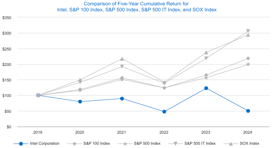

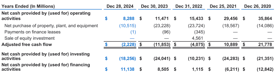

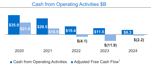

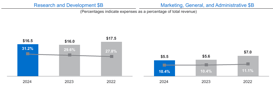

In [22]:
matching_results_image = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",  # Use image description text embedding
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=5,
    embedding_size=1408,
)

# Markdown(print_text_to_image_citation(matching_results_image, print_top=True))
print("\n **** Result: ***** \n")

# Display the top matching image
display_images(
    [
        matching_results_image[0]["img_path"],
        matching_results_image[1]["img_path"],
        matching_results_image[2]["img_path"],
        matching_results_image[3]["img_path"],
    ],
    resize_ratio=0.3,
)

In [23]:
%%time

print("\n **** Result: ***** \n")

instruction = f"""Answer the question and explain results with the given Image:
Question: {query}
Image:
"""

# Prepare the model input
model_input = [
    instruction,
    # passing all matched images to Gemini
    "Image:",
    matching_results_image[0]["image_object"],
    "Description:",
    matching_results_image[0]["image_description"],
    "Image:",
    matching_results_image[1]["image_object"],
    "Description:",
    matching_results_image[1]["image_description"],
    "Image:",
    matching_results_image[2]["image_object"],
    "Description:",
    matching_results_image[2]["image_description"],
    "Image:",
    matching_results_image[3]["image_object"],
    "Description:",
    matching_results_image[3]["image_description"],
]

# Generate Gemini response with streaming output
rich_Markdown(
    get_gemini_response(
        multimodal_model_2_0_flash,
        model_input=model_input,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: total: 62.5 ms
Wall time: 4.24 s


Okay, let's analyze Intel's recent stock performance based on the provided images and financial data.              

Stock Performance Summary (From the First Image):                                                                  

 • Underperformance: The first image clearly shows that Intel's stock performance (blue line) has significantly    
   underperformed compared to the S&P 100, S&P 500, S&P 500 IT, and SOX indices over the period from 2019 to 2024. 
 • Volatility: Intel's stock price has been volatile, with significant fluctuations.                               
 • Recent Decline: From 2019 starting with an index of 100 it decreased to approximately $50 in 2024.              

Financial Data Analysis (From the Second, Third and Fourth Images):                                                

 • Operating Activities: Net cash provided by operating activities has declined significantly from $35.9B in 2020  
   to $8.3B in 2024.                                                                                               
 • Adjusted Free Cash Flow: Adjusted free cash flow has also declined dramatically and has become negative in      
   recent years. It went from $21.8B in 2020 to -$2.2B in 2024.                                                    
 • Investing Activities: Net cash used for investing activities is consistently high, indicating large investments 
   in property, plant, and equipment.                                                                              
 • Research and Development (R&D): R&D spending remains a significant expense, and as a percentage of revenue, it  
   was around 31.2% in 2024.                                                                                       

Putting it Together:                                                                                               

The stock performance in the first image likely reflects the underlying financial performance revealed in the      
subsequent tables and figures. The substantial decline in operating cash flow and adjusted free cash flow, while   
R&D spending remains high and Capital Expenditure is large, suggests underlying challenges. The high investment    
activities indicates that the company is potentially investing heavily to improve future growth.                   

In Conclusion:                                                                                                     

Intel's recent stock performance has been poor compared to broader market indices and industry-specific indices.   
This performance is likely linked to a decline in operating cash flow and adjusted free cash flow, even with       
considerable investments in research and development.

In [24]:
## you can check the citations to probe further.
## check the "image description:" which is a description extracted through gemini which helped search our query.
rich_print(print_text_to_image_citation(matching_results_image, print_top=False))

Citation 1: Matched image path, page number and page text: 

score:  0.71
file_name:  data\intel.pdf
path:  images\intel.pdf_image_2_0_28.png
page number:  3
page text:   
 
Non-GAAP Financial Measures 
In addition to disclosing financial results in accordance with US GAAP, this document references 
adjusted free cash flow, a non-GAAP financial measure. This measure is used by management 
when assessing our sources of liquidity, capital resources, and quality of earnings and provides an 
additional means to evaluate the cash flow trends of our business. Adjusted free cash flow is 
operating cash flow adjusted for (1) additions to property, plant, and equipment, net of proceeds 
from capital-related government incentives and net partner contributions, (2) payments on finance 
leases, and (3) proceeds from the McAfee equity sale in 2022. This non-GAAP financial measure 
should not be considered a substitute for, or superior to, financial measures calculated in 
accordance with US GAAP, a

None

### Comparative reasoning

Next, let's apply what you have done so far in doing comparative reasoning.

For this example:

* **Step 1:** You will search all the images for a specific query

* **Step 2:** Send those images to Gemini 2.0 Flash to ask multiple questions, where it has to compare among those images and provide you with answers.

In [25]:
matching_results_image_query_1 = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query="Show me all the images that can describe stock performance of Intel",
    column_name="text_embedding_from_image_description",  # Use image description text embedding # mm_embedding_from_img_only text_embedding_from_image_description
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=5,
    embedding_size=1408,
)

---------------Matched Images------------------



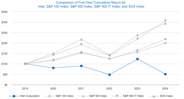

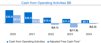

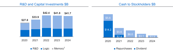

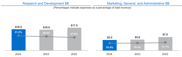

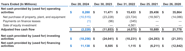

In [26]:
# Check Matched Images
# You can access the other two matched images using:

print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image_query_1[0]["img_path"],
        matching_results_image_query_1[1]["img_path"],
        matching_results_image_query_1[2]["img_path"],
        matching_results_image_query_1[3]["img_path"],
        matching_results_image_query_1[4]["img_path"],
    ],
    resize_ratio=0.2,
)

In [27]:
prompt = f"""Task: Answer the following questions in detail, providing clear reasoning and evidence from the images in bullet points.
Instructions:
1. Analyze the provided images focusing on the relationship between TPU v5e scaling efficiency, LLM model size growth, performance metrics, and quantization effects.
2. Answer the following questions in detail, providing clear reasoning and evidence from the images in bullet points
3. Cite the image sources to support your explanations. Mention the file name.

Additional Considerations:
* Clearly define any technical terms (e.g., EMFU, TFLOP/chip/s) within your answers for better understanding.
* Use specific examples and data points from the images to support your explanations.
* Feel free to request additional information or clarification if the images are unclear or ambiguous.

Question:
 - How does the scaling efficiency of TPU v5e compare to the overall growth in LLM model size over time?
 - How does the model size impact the observed Per-chip performance and EMFU for a fixed number of TPU v5e chips (e.g., 256)?
 - For the INT8 Quant training with 32B parameters, how does its high EMFU relate to the observed TFLOP/chip/s?
 - how does the "per device batch (seq)" for a 16B model compare to a 128B model, and how does this affect the "Total observed Perf"?
 - how might the MFU be impacted by increasing LLM model size?
"""

In [28]:
%%time
# Generate response with Gemini 2.0 Flash
print("\n **** Result: ***** \n")
rich_Markdown(
    get_gemini_response(
        multimodal_model_2_0_flash,
        model_input=[
            prompt,
            "Images:",
            matching_results_image_query_1[0]["image_object"],
            matching_results_image_query_1[1]["image_object"],
            matching_results_image_query_1[2]["image_object"],
            matching_results_image_query_1[3]["image_object"],
            matching_results_image_query_1[4]["image_object"],
        ],
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: total: 0 ns
Wall time: 1.71 s


Apologies, but the provided images do not contain any information about TPU v5e scaling efficiency, LLM model size,
performance metrics, or quantization effects. They focus on financial data related to Intel Corporation, including 
stock performance, cash flow, R&D investments, and shareholder returns.                                            

Therefore, I cannot answer your questions based on these images. Please provide the correct images related to TPU  
v5e and LLM performance for me to address your questions.

## Building Multimodal QA System with retrieval augmented generation (mRAG)

Let's bring everything together to implement multimodal RAG. You will use all the elements that you've explored in previous sections to implement the multimodal RAG. These are the steps:

* **Step 1:** The user gives a query in text format where the expected information is available in the document and is embedded in images and text.
* **Step 2:** Find all text chunks from the pages in the documents using a method similar to the one you explored in `Text Search`.
* **Step 3:** Find all similar images from the pages based on the user query matched with `image_description` using a method identical to the one you explored in `Image Search`.
* **Step 4:** Combine all similar text and images found in steps 2 and 3 as `context_text` and `context_images`.
* **Step 5:** With the help of Gemini, we can pass the user query with text and image context found in steps 2 & 3. You can also add a specific instruction the model should remember while answering the user query.
* **Step 6:** Gemini produces the answer, and you can print the citations to check all relevant text and images used to address the query.

### Step 1: User query

In [29]:
# this time we are not passing any images, but just a simple text query.

query = """- Based on the chart, how would you describe the relationship between the absolute spending on Research and Development (in $B) and its value as a percentage of total revenue from 2022 to 2024?
 - According to this chart, what major trend is observed for both "Cash from Operating Activities" and "Adjusted Free Cash Flow" between 2020 and 2024, and what does the widening gap between the two metrics in recent years imply?
 - Looking at the "Cash to Stockholders" graph, what significant shift in capital return strategy is evident between 2020 and 2024, particularly concerning share repurchases?
 - How has Intel Corporation's stock performance compared to the SOX (PHLX Semiconductor Sector) Index over the five-year period shown, and what was the approximate final value of a $100 investment in Intel versus the SOX Index in 2024?
 - Based on the financial data provided, what line item is the primary driver of the negative "Adjusted free cash flow" in the years 2022, 2023, and 2024?
 """

### Step 2: Get all relevant text chunks

In [30]:
# Retrieve relevant chunks of text based on the query
matching_results_chunks_data = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=20,   
    chunk_text=True,
)

### Step 3: Get all relevant images

In [31]:
# Get all relevant images based on user query
matching_results_image_fromdescription_data = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",
    image_emb=False,
    top_n=10,
    embedding_size=1408,
)

### Step 4: Create context_text and context_images

In [32]:
instruction = """Task: Answer the following questions in detail, providing clear reasoning and evidence from the images and text in bullet points.
Instructions:

1. **Analyze:** Carefully examine the provided images and text context.
2. **Synthesize:** Integrate information from both the visual and textual elements.
3. **Reason:**  Deduce logical connections and inferences to address the question.
4. **Respond:** Provide a concise, accurate answer in the following format:

   * **Question:** [Question]
   * **Answer:** [Direct response to the question]
   * **Explanation:** [Bullet-point reasoning steps if applicable]
   * **Source** [name of the file, page, image from where the information is citied]

5. **Ambiguity:** If the context is insufficient to answer, respond "Not enough context to answer."

"""

# combine all the selected relevant text chunks
context_text = ["Text Context: "]
for key, value in matching_results_chunks_data.items():
    context_text.extend(
        [
            "Text Source: ",
            f"""file_name: "{value["file_name"]}" Page: "{value["page_num"]}""",
            "Text",
            value["chunk_text"],
        ]
    )

# combine all the selected relevant images
gemini_content = [
    instruction,
    "Questions: ",
    query,
    "Image Context: ",
]
for key, value in matching_results_image_fromdescription_data.items():
    gemini_content.extend(
        [
            "Image Path: ",
            value["img_path"],
            "Image Description: ",
            value["image_description"],
            "Image:",
            value["image_object"],
        ]
    )
gemini_content.extend(context_text)

### Step 5: Pass context to Gemini

In [33]:
# Generate Gemini response with streaming output
rich_Markdown(
    get_gemini_response(
        multimodal_model_2_0_flash,
        model_input=gemini_content,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)

Here are the answers to your questions, based on the provided text and images:                                     

 • Question: Based on the chart, how would you describe the relationship between the absolute spending on Research 
   and Development (in $B) and its value as a percentage of total revenue from 2022 to 2024?                       
 • Answer: While absolute spending on Research and Development decreased from 2022 to 2024, its value as a         
   percentage of total revenue increased.                                                                          
 • Explanation:                                                                                                    
    • Research and Development spending in $B: 2022: $17.5B, 2023: $16.0B, 2024: $16.5B.  The spending decreases   
      from 2022 to 2023, and then increases from 2023 to 2024, but it is still less than it was in 2022.           
    • Research and Development as a percentage of total revenue: 2022: 27.8%, 2023: 29.6%, 2024: 31.2%. The        
      percentage consistently increased from 2022 to 2024.                                                         
 • Source: images\intel.pdf_image_0_0_21.png                                                                       
 • Question: According to this chart, what major trend is observed for both "Cash from Operating Activities" and   
   "Adjusted Free Cash Flow" between 2020 and 2024, and what does the widening gap between the two metrics in      
   recent years imply?                                                                                             
 • Answer: Both "Cash from Operating Activities" and "Adjusted Free Cash Flow" show a decreasing trend from 2020 to
   2024. The widening gap between the two metrics in recent years implies increasing capital expenditures or other 
   factors are negatively impacting the adjusted free cash flow compared to the cash generated from operations.    
 • Explanation:                                                                                                    
    • The values for "Cash from Operating Activities" are: 2020: $35.9B, 2021: $29.5B, 2022: $15.4B, 2023: $11.5B, 
      2024: $8.3B.                                                                                                 
    • The values for "Adjusted Free Cash Flow" are: 2020: $21.8B, 2021: $10.9B, 2022: $(4.1)B, 2023: $(11.9)B,     
      2024: $(2.2)B.                                                                                               
    • The difference between Cash from Operating Activities and Adjusted Free Cash Flow is getting bigger between  
      2020 and 2024. This is also clear because adjusted free cash flow goes negative in 2022-2024.                
 • Source: images\intel.pdf_image_1_0_24.png                                                                       
 • Question: Looking at the "Cash to Stockholders" graph, what significant shift in capital return strategy is     
   evident between 2020 and 2024, particularly concerning share repurchases?                                       
 • Answer: There is a significant shift in capital return strategy with a substantial decrease in share repurchases
   from 2020 to 2024, with the amount spent on repurchases dramatically decreasing over the years.                 
 • Explanation:                                                                                                    
    • Cash to Stockholders: 2020 - $14.2B (Repurchases) + $5.6B (Dividends); 2021 - $2.4B (Repurchases) + $5.6B    
      (Dividends); 2022 - $6.0B (Dividends); 2023 - $3.1B (Dividends); 2024 - $1.6B (Dividends).  Repurchases      
      decreased significantly and dividends also decreased. The text also confirms that the most recent repurchase 
      was in the first quarter of 2021, and dividends were suspended starting in Q4 2024.                          
 • Source: images\intel.pdf_image_1_1_25.png, data\inte

### Step 6: Print citations and references [Optional]

**Optional:** Uncomment to see the detailed citations.

In [34]:
# print("---------------Matched Images------------------\n")
# display_images(
#     [
#         matching_results_image_fromdescription_data[0]["img_path"],
#         matching_results_image_fromdescription_data[1]["img_path"],
#     ],
#     resize_ratio=0.2,
# )

In [35]:
# # Image citations. You can check how Gemini generated metadata helped in grounding the answer.

# print_text_to_image_citation(
#     matching_results_image_fromdescription_data, print_top=True
# )

In [36]:
# # Text citations

# print_text_to_text_citation(
#     matching_results_chunks_data,
#     print_top=True,
#     chunk_text=True,
# )

### Multimodal RAG

### More questions with Multimodal QA System

In [37]:
# Some questions to try
# this time we are not passing any images, but just a simple text query.
query = """Question 1: Imagine a patient presents with new onset prurigo nodularis.
Could Med-Gemini-M 1.5 be used to analyze dermatological images of the patient’s lesions in conjunction with a comprehensive history taken
from an EHR dialogue to help a clinician reach a diagnosis and develop a treatment plan?
What are the limitations and potential ethical considerations of using the model in this way?

Question 2: The paper focuses on uncertainty-guided search for text-based reasoning tasks.
How could this approach be extended to multimodal tasks?
For instance, if Med-Gemini-M 1.5 encounters uncertainty when analyzing a dermatology image, could it generate queries to
search for relevant visual examples or supplemental clinical information to refine its interpretation?

Question 3:  Considering the potential benefits and risks highlighted in the paper, what specific steps should be taken during the development,
validation, and deployment of Med-Gemini models to ensure they are used safely, fairly, and effectively in real-world clinical settings?
How can these steps be informed by ongoing collaboration between researchers, clinicians, regulators, and patient communities?
 """

(
    response,
    matching_results_chunks_data,
    matching_results_image_fromdescription_data,
) = get_answer_from_qa_system(
    query,
    text_metadata_df,
    image_metadata_df,
    top_n_text=10,
    top_n_image=5,
    model=multimodal_model_2_0_flash,
    safety_settings=safety_settings,
    generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
)

rich_Markdown(response)

 • Question: Imagine a patient presents with new onset prurigo nodularis. Could Med-Gemini-M 1.5 be used to analyze
   dermatological images of the patient’s lesions in conjunction with a comprehensive history taken from an EHR    
   dialogue to help a clinician reach a diagnosis and develop a treatment plan? What are the limitations and       
   potential ethical considerations of using the model in this way?                                                
 • Answer: Not enough context to answer.                                                                           
 • Explanation: The provided context doesn't offer specifics on the capabilities of Med-Gemini-M 1.5 regarding     
   dermatology or its limitations and ethical considerations in a clinical setting.                                
 • Source: N/A                                                                                                     
 • Question: The paper focuses on uncertainty-guided search for text-based reasoning tasks. How could this approach
   be extended to multimodal tasks? For instance, if Med-Gemini-M 1.5 encounters uncertainty when analyzing a      
   dermatology image, could it generate queries to search for relevant visual examples or supplemental clinical    
   information to refine its interpretation?                                                                       
 • Answer: Not enough context to answer.                                                                           
 • Explanation: The provided context doesn't detail uncertainty-guided search or its application to multimodal     
   tasks, specifically within Med-Gemini-M 1.5.                                                                    
 • Source: N/A                                                                                                     
 • Question: Considering the potential benefits and risks highlighted in the paper, what specific steps should be  
   taken during the development, validation, and deployment of Med-Gemini models to ensure they are used safely,   
   fairly, and effectively in real-world clinical settings? How can these steps be informed by ongoing             
   collaboration between researchers, clinicians, regulators, and patient communities?                             
 • Answer: Not enough context to answer.                                                                           
 • Explanation: The provided context does not contain information about the benefits and risks associated with     
   Med-Gemini models, nor does it specify the steps for safe, fair, and effective deployment in clinical settings. 
 • Source: N/A

In [38]:
# Some questions to try

query = """Question 1: How does the mixture-of-experts architecture in Gemini 1.5 Pro contribute to its ability to handle long
context while maintaining performance on core capabilities? Discuss the potential trade-offs involved.

Question 2: Gemini 1.5 Pro incorporates various safety mitigations, including supervised fine-tuning and reinforcement learning.
Discuss the effectiveness of these mitigations in addressing content safety and representational harms in both text-to-text and
image-to-text modalities. How can these evaluations be improved?

Question 3: Gemini 1.5 Pro demonstrates surprising in-context language learning capabilities for Kalamang,
a low-resource language. What are the implications of this finding for language preservation and revitalization?
What challenges need to be addressed for broader applicability of this approach?
"""
(
    response,
    matching_results_chunks_data,
    matching_results_image_fromdescription_data,
) = get_answer_from_qa_system(
    query,
    text_metadata_df,
    image_metadata_df,
    top_n_text=10,
    top_n_image=5,
    model=multimodal_model_2_0_flash,
    safety_settings=safety_settings,
    generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
)

rich_Markdown(response)

 • Question: How does the mixture-of-experts architecture in Gemini 1.5 Pro contribute to its ability to handle    
   long context while maintaining performance on core capabilities? Discuss the potential trade-offs involved.     
 • Answer: Not enough context to answer.                                                                           
 • Explanation: The provided documents do not mention Gemini 1.5 Pro or any details about its architecture.        
   Therefore, it is impossible to explain the contribution of the mixture-of-experts architecture to its           
   capabilities or discuss any trade-offs.                                                                         
 • Source: N/A                                                                                                     
 • Question: Gemini 1.5 Pro incorporates various safety mitigations, including supervised fine-tuning and          
   reinforcement learning. Discuss the effectiveness of these mitigations in addressing content safety and         
   representational harms in both text-to-text and image-to-text modalities. How can these evaluations be improved?
 • Answer: Not enough context to answer.                                                                           
 • Explanation: The provided documents do not mention Gemini 1.5 Pro or any details about its safety mitigations.  
   Therefore, it is impossible to discuss the effectiveness of supervised fine-tuning and reinforcement learning in
   addressing content safety and representational harms or how these evaluations can be improved.                  
 • Source: N/A                                                                                                     
 • Question: Gemini 1.5 Pro demonstrates surprising in-context language learning capabilities for Kalamang, a      
   low-resource language. What are the implications of this finding for language preservation and revitalization?  
   What challenges need to be addressed for broader applicability of this approach?                                
 • Answer: Not enough context to answer.                                                                           
 • Explanation: The provided documents do not mention Gemini 1.5 Pro, Kalamang, or language preservation.          
   Therefore, it is impossible to analyze the implications or challenges.                                          
 • Source: N/A

## Conclusions

Congratulations on making it through this multimodal RAG notebook!

While multimodal RAG can be quite powerful, note that it can face some limitations:

* **Data dependency:** Needs high-quality paired text and visuals.
* **Computationally demanding:** Processing multimodal data is resource-intensive.
* **Domain specific:** Models trained on general data may not shine in specialized fields like medicine.
* **Black box:** Understanding how these models work can be tricky, hindering trust and adoption.


Despite these challenges, multimodal RAG represents a significant step towards search and retrieval systems that can handle diverse, multimodal data.